## Kapitel 2.1 + 2.2

### Homogen representation av linjer
Punkter i $\mathbb{R}^2$ skrivs som $\mathbf{x} = (x, y)^T$

Linjens ekvation i $\mathbb{R}^2$
$$ax + by + c = 0$$

En naturlig represenation är vektorn $(a, b, c)^T$. Men alla vektorer $k(a, b, c)^T$ där $k!=0$ representerar samma linje. Parametrarna $a, b, c$ är bara bestämda upp till en viss skala. Alla representationer $k(a, b, c)^T$ är lika goda företrädare för en viss linje.

Alla dessa linjer $k(a, b, c)$ i $\mathbf{R}^3$ skapar $\mathbb{P}^2$

## Homogen representation av punkter
En punkt $\mathbf{x} = (x, y)^T$ ligger på linjen $\mathbf{l} = (a, b, c)^T$ om och bara om $ax + by + c = 0$ eller $(x, y, 1)(a, b, c)^T = 0$. Detsamma gäller för $(kx, ky, k)(a, b, c)^T = 0$. Om vi byter ut $x$ mot $x_1/x_3$ och $y$ mot $x_2/x_3$ får vi helt enkelt

$$(a, b, c)(x_1, x_2, x_3)^T = 0$$
eller
$$\mathbf{x}^T\mathbf{l} = 0$$



## Skärningspunkt mellan linjer
Givet två linjer $\mathbf{l} = (a, b, c)^T$ och $\mathbf{l}' = (a', b', c')^T$ vill vi hitta deras skärningspunkt.

Ta vektorn
$$\mathbf{x} = \mathbf{l} \times \mathbf{l}'$$

Vi vet att

$$\mathbf{l}(\mathbf{l} \times \mathbf{l}') = \mathbf{l}'(\mathbf{l} \times \mathbf{l}') = 0$$ 

och därmed är också 

$$\mathbf{l}^T\mathbf{x} = \mathbf{l}'^T\mathbf{x} = 0$$


## Linjen mellan två punkter
På samma sätt är linjen genom två punkter $\mathbf{x}$ och $\mathbf{x}'$
$\mathbf{l} = \mathbf{x} \times \mathbf{x}'$

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
import numpy as np

BOUNDS = ((-50, -50), (50, 50))
def plot_line(line, bounds=None, n=128):
    ((ax, ay), (bx, by)) = bounds or BOUNDS
    x, y = np.meshgrid(np.linspace(ax, bx, n), np.linspace(ay, by, n))
    points = np.dstack((x, y, np.ones(x.shape)))
    plt.contour(x, y, np.dot(points, line), [0])
    plt.axis('equal')
    
plot_line((1, 0, -10))  # x = 10
plot_line((1, 1, 0))  # x + y = 0

In [ ]:
def intersection(line1, line2):
    return np.cross(line1, line2)

def dehomogenize(v):
    x, y, w = v
    return x/w, y/w

def plot_point(p):
    plt.plot(*dehomogenize(p), 'o', markersize=4*4)

line1 = np.array([1, 0, -10])  # x = 10
line2 = np.array([1, 1, 0])  # x + y = 0
plot_line(line1)  # x = 10
plot_line(line2)  # x + y = 0

plot_point(intersection(line1, line2))

In [ ]:
def line_through(point1, point2):
    return np.cross(point1, point2)

point1 = np.array([10, 20, 1])
point2 = np.array([20, 25, 1])
plot_point(point1)
plot_point(point2)
plot_line(line_through(point1, point2))


## Ideala punkter och linjen vid oändligheten

Ideala punkter: $\mathbf{x} = (x_1, x_2, 0)^T$

Skärningspunkten mellan två linjer med samma riktning $\mathbf{l} = (a, b, c)^T$ och $\mathbf{l}' = (a, b, c')$ är $(c' - c)(b, -a, 0)^T$ eller bara $(b, -a, 0)^T$. Sista elementet är $0$ representerar ingen punkt i $\mathbb{R}^2$ men representerar punkter oändligt långt bort i riktningen $(a, b)$ i $\mathbb{P}^2$. Paralella linjer skär varandra oändligt långt bort.

Alla dessa punkter ligger på en linje $\mathbf{l}_\infty = (0, 0, 1)^T$ då $(x_1, y_1, 0)(0, 0, 1)^T = 0$

I $\mathbb{P}^2$ möts alltid två linjer i en punkt och det går alltid en linje genom två punkter.

## Dualitetsprincipen
Linjer och punkter kan ömsesidigt bytas ut mot varandra.


## Kägelsnitt (conics)

I $\mathbb{R}^2$ kan vi definiera en kvadratisk kurva som ett polynom.
$$ax^2 + bxy + cy^2 + dx + ey + f = 0$$

I $\mathbb{P}^2$ kan vi formulera en kurva genom att byta ut $x \rightarrow x_1/x_3, y \rightarrow x_2/x_3$ för att få

$$ax_1^2$ + bx_1x_2 + cx_2^2 + dx_1x_3 + ex_2x_3 + fx_3^2 = 0$$

Eller i matrixform

$$\mathbf{x}^T\mathtt{C}\mathbf{x} = 0$$

Där

$$
\mathtt{C} = \begin{bmatrix}
a & b/2 & d/2 \\
b/2 & c & e/2 \\
d/2 & e/2 & f \\
\end{bmatrix}
$$



* Studerades redan på 200-talet före Kristus av Apollonius från Perga.

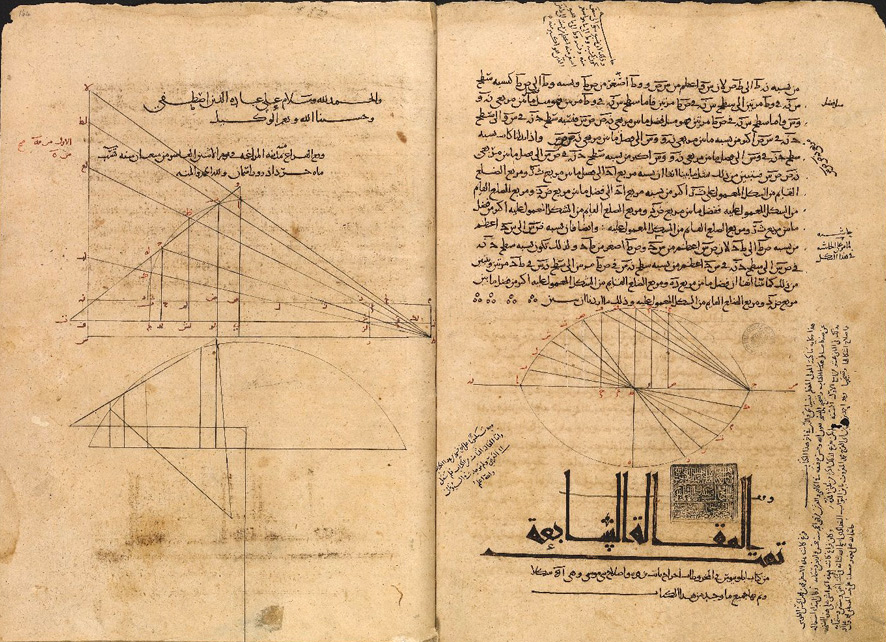
_Utsnitt från arabisk översättning 800-talet._

In [ ]:
def plot_conic(conic, bounds=None, n=128):
    ((ax, ay), (bx, by)) = bounds or BOUNDS
    x, y = np.meshgrid(np.linspace(ax, bx, n), np.linspace(ay, by, n))
    p = np.array((x, y, np.ones(x.shape))).transpose()
    equation = np.einsum('ijk,kn,ijn->ij', p, conic, p)  # p.T * C * p
    plt.contour(x, y, equation, [0])
    plt.axis('equal')

# x^2 + y^2 = 10^2
C = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, -100],
])

plot_conic(C)


In [ ]:
def conic(a, b, c, d, e, f):
    """Arranges a conic in polynomial form in a C-matrix"""
    return np.array([
        [ a,  b/2, d/2],
        [b/2,   c, e/2],
        [d/2, e/2,   f],
    ])

plot_conic(conic(1, 0, 1, 0, 0, -100))


In [ ]:
def to_polynomial(conic):
    indices = (
        np.array([0, 0, 1, 0, 1, 2]),
        np.array([0, 1, 1, 2, 2, 2]),
    )
    return conic[indices] * np.array([1, 2, 1, 2, 2, 1])

def is_zero(x):
    return np.isclose(x, 0)

# parametric
def parametric(conic):
    """Converts a conic in matrix form into parametric form"""
    a, b, c, d, e, f = to_polynomial(conic)
    # all quadratic terms (a and c) can't be zero 
    assert not all((is_zero(a), is_zero(c)), "degenerate conic"

    if a > 0 and c > 0:
        # elipse
        M = np.array([
            [a, b/2],
            [b/2, c],
        ])
        lambda1, lambda2 = np.linalg.eigvals(M)
        a = np.sqrt(-np.linalg.det(conic)) / (np.linalg.det(M) * lambda1)
        b = np.sqrt(-np.linalg.det(conic)) / (np.linalg.det(M) * lambda2)
        h = (b*e - 2*c*d) / (4*a*c - b*b)
        k = (b*d - 2*a*e) / (4*a*c - b*b)
        tau = np.arctan(b/(a - c)) / 2
        R = np.array([
            [np.cos(tau), -np.sin(tau)],
            [np.sin(tau), np.cos(tau)],
        ])
    
        def ellipse(t):
            return (np.array([h, k]) + np.dot(R, np.array([a * np.cos(t), b * np.sin(t)])).T).T

        return ellipse

    if np.isclose(a, 0) or np.isclose(a, 0):
        # parabola
        pass
    
    # hyperbola
    assert a > 0 != b > 0, "degenerate hyperbola"

    
p = parametric(C)
TAU = 2 * np.pi
alpha = np.linspace(0, TAU)
x, y = p(alpha)
plt.plot(x, y)
plt.axis('equal')